In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# set figure resolution
import matplotlib as mpl
dpi=300
mpl.rcParams['figure.dpi'] = dpi
mpl.rc("savefig", dpi=dpi)

In [2]:
df = pd.read_csv('refined_dM.csv')
df.head()

session_id  \
0  sub-HC015_ses-MR_FOLLOWUP   
1  sub-HC025_ses-MR_BASELINE   
2  sub-HC025_ses-MR_FOLLOWUP   
3  sub-HC005_ses-MR_BASELINE   
4  sub-HC005_ses-MR_FOLLOWUP   

                                         gray_matter  \
0  [nan, 0.036367, 0.030014, 0.024612, 0.018347, ...   
1  [nan, 0.040535, 0.029705, 0.030699, 0.026136, ...   
2  [nan, nan, 0.027759, 0.018698, 0.014911, 0.013...   
3  [nan, nan, 0.030915, 0.028319, 0.021014, 0.018...   
4  [nan, nan, 0.022244, 0.017955, 0.0194, 0.01465...   

                                                 acc  \
0  [nan, 0.031439, 0.024474, 0.020017, 0.009921, ...   
1  [nan, 0.028815, 0.021619, 0.019555, 0.018986, ...   
2  [nan, 0.02391, 0.022244, 0.012148, 0.010913, 0...   
3  [nan, 0.036394, 0.025192, 0.023385, 0.013777, ...   
4  [nan, 0.030378, 0.021136, 0.013982, 0.017686, ...   

                                              insula  \
0  [nan, 0.029707, 0.023442, 0.013236, 0.008785, ...   
1  [nan, 0.024612, 0.017674, 0.018719, 0.017005, ...   
2  [nan, 0.023377, 0.022453, 0.013957, 0.00939, 0...   
3  [nan, 0.028567, 0.021199, 0.02043, 0.012227, 0...   
4  [nan, 0.028926, 0.018105, 0.013776, 0.016434, ...   

                                             caudate  \
0  [0.020504, 0.017798, 0.013022, 0.009686, 0.006...   
1  [nan, 0.014892, 0.009294, 0.009135, 0.009696, ...   
2  [nan, 0.012984, 0.010903, 0.006265, 0.004185, ...   
3  [nan, 0.019715, 0.011383, 0.012684, 0.004337, ...   
4  [nan, 0.018874, 0.012538, 0.007039, 0.01058, 0...   

                                             putamen    Hb       T1a  
0  [nan, 0.023193, 0.016136, 0.01437, 0.009061, 0...  14.8  4.933333  
1  [nan, 0.01853, 0.013335, 0.01409, 0.010391, 0....  15.9  5.300000  
2  [nan, 0.017441, 0.016612, 0.010571, 0.007251, ...  15.9  5.300000  
3  [nan, 0.022601, 0.015416, 0.014497, 0.00756, 0...  12.2  4.066667  
4  [nan, nan, 0.011758, 0.009262, 0.010172, 0.006...  12.2  4.066667

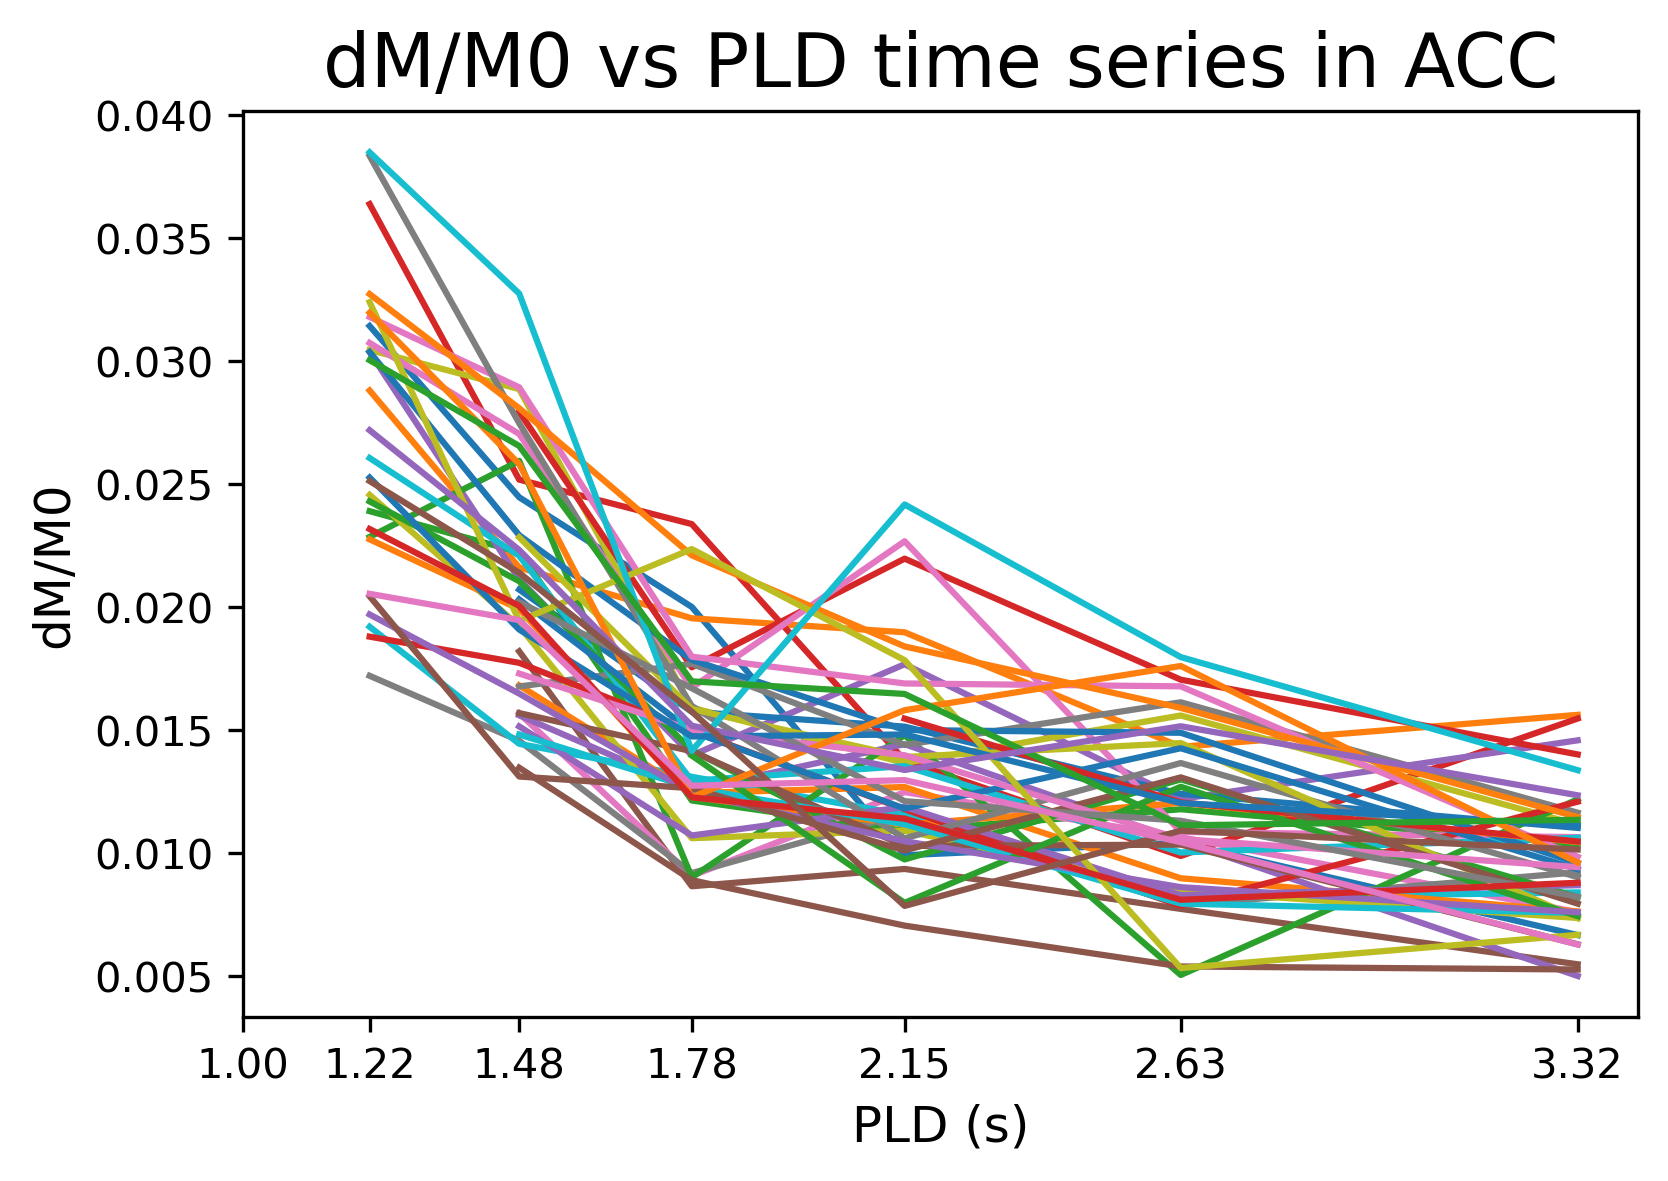

In [6]:
delays = [1, 1.22, 1.48, 1.78, 2.15, 2.63, 3.32] # post-labeling durations
fig, ax = plt.subplots()

plt.rc('font', size=10)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=18)

for index, row in df.iterrows():
    data = row.acc[1:-1].split(',') # convert string to list
    data = [float(i) for i in data if i != ' None']   
    ax.plot(delays, data, label=row.session_id)

ax.set_xticks(delays)
plt.xlabel('PLD (s)')
plt.ylabel('dM/M0')
plt.title('dM/M0 vs PLD time series in ACC')
plt.show()

NOTE: Deleted sub-HC004_ses-MR_FOLLOWUP, sub-HC004_ses-MR_BASELINE, sub-HC002_ses-MR_BASELINE

In [8]:
fig = plt.figure(figsize=(38,22))
delays = [1, 1.22, 1.48, 1.78, 2.15, 2.63, 3.32]
rois = ['acc', 'insula', 'caudate', 'putamen', 'gray_matter']

# set font sizes & y axis limits
SMALL_SIZE = 20
MEDIUM_SIZE = 26
LARGE_SIZE = 32
TITLE_SIZE = 38
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('axes', titlesize=LARGE_SIZE)

ylim=[0,0.05]

import matplotlib.gridspec as gridspec
spec = gridspec.GridSpec(ncols=6,nrows=2, figure=fig)

f_ax1 = fig.add_subplot(spec[0,:2])
f_ax2 = fig.add_subplot(spec[0,2:4])
f_ax3 = fig.add_subplot(spec[0,4:])
f_ax4 = fig.add_subplot(spec[1, 1:3])
f_ax5 = fig.add_subplot(spec[1, 3:5])
f_axes= [f_ax1, f_ax2, f_ax3, f_ax4, f_ax5]

for i, ax in enumerate(f_axes):
    if i < len(rois):
        roi = rois[i]
            
        for index, row in df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]   
            ax.plot(delays, data)
            ax.set_xlabel('PLD (s)')
            ax.set_ylabel('dM/M0')
            ax.set_ylim(ylim)
            ax.set_title(roi)
            ax.set_xticks(delays)


plt.xlabel('PLD (s)')
fig.suptitle('dM/M0 Time Series Data: dM/M0 vs PLD', fontsize=TITLE_SIZE)
fig.tight_layout()

# save fig to file
fname="../figs/dMM0_timeseries.png"
plt.savefig(fname, facecolor='white', edgecolor='none')